# Generate Synthetic Data

In [1]:
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import SimParams, OptimizationParameters
from act.cell_model import TargetCell, ModuleParameters

target_cell = TargetCell(
    hoc_file="/home/mwsrgf/proj/ACT/data/Spiker/orig/template.hoc",
    mod_folder="/home/mwsrgf/proj/ACT/data/Spiker/orig",
    cell_name="Simple_Spiker_orig",
    g_names = ["gnabar_hh_orig", "gkbar_hh_orig", "gl_hh_orig"]
)

sg = SyntheticGenerator(
    ModuleParameters(
        module_folder_name="spiker_orig",
        cell= target_cell,
        sim_params= SimParams(
            h_v_init=-65.0,  # Consistent with nrngui settings
            h_tstop=400,     # Simulation time in ms
            h_dt=1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI_type="constant",
            CI_amps=[0.1,0.2,0.3],   # Current injection amplitude
            CI_dur=350,      # Duration of current injection
            CI_delay=50,     # Delay before current injection
            set_g_to=[]
        ),
        optim_params = OptimizationParameters(
            blocked_channels= []
        )
    )
)

sg.generate_synthetic_target_data("target_data.csv")

/home/mwsrgf/act-venv/lib64/python3.9/site-packages/torch/__init__.py:955: UserWarning: torch.set_default_tensor_type() is deprecated as of PyTorch 2.1, please use torch.set_default_dtype() and torch.set_default_device() as alternatives. (Triggered internally at ../torch/csrc/tensor/python_tensor.cpp:432.)
  _C._set_default_tensor_type(t)
--No graphics will be displayed.


Blocking: []
Total number of jobs: 3
Total number of proccessors: 192
h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3


h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0


h.dt: 1.0h.dt: 1.0h.dt: 1.0


h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0


h.v_init: -65.0h.v_init: -65.0h.v_init: -65.0


Capacitance (cm) of soma: 1.0Capacitance (cm) of soma: 1.0
Capacitance (cm) of soma: 1.0

Leak Conductance (Mho/cm^2) attribute not found in somaLeak Conductance (Mho/cm^2) attribute not found in soma

Leak Conductance (Mho/cm^2) attribute not found in somaLeak Reversal (mV) attribute not found in somaLeak Reversal (mV) attribute not found in soma


Leak Reversal (mV) attribute not found in somaFound 2 section(s) in this cell. Calculating the total surface area of the cell.Found 2 section(s) in this cell. Calculating the total surface area of the cell.


Found 2 section(s) in this cell. Calculating the total surface area of the cell.Cell Area (cm^2) of soma: 2.2207290149695532e-05Cell Area (cm

(400,)


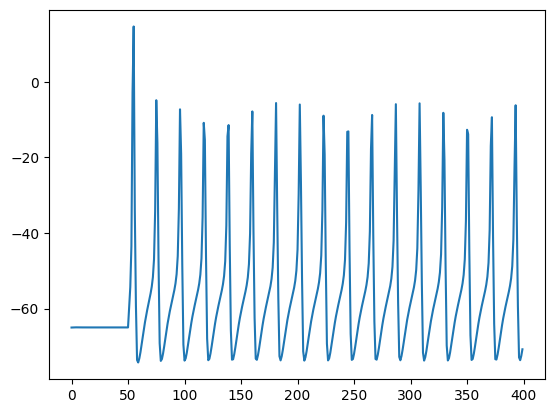

In [2]:
import numpy as np
dataset = np.load('./model/spiker_orig/synthetic_0.1_0.2_0.3_/combined_out.npy')

V = dataset[0,:,0]
print(V.shape)

from matplotlib import pyplot as plt

plt.plot(V)

In [ ]:
sg_passive = SyntheticGenerator(
    ModuleParameters(
        module_folder_name="spiker_orig",
        cell= target_cell,
        sim_params= SimParams(
            h_v_init = -65,
            h_tstop = 500,
            h_dt = 1,
            h_celsius = 6.3,
            CI_type = "constant",
            CI_amps = [-0.1],    ##################### NEGATIVE CURRENT INJECTION ###################
            CI_dur = 300,
            CI_delay = 100,
            set_g_to=[]
        ),
        optim_params = OptimizationParameters(
            blocked_channels= ["gnabar_hh_seg", "gkbar_hh_seg"]
        )
    )
)

sg_passive.generate_synthetic_target_data("passive_data.csv")

In [ ]:
import numpy as np
dataset = np.loadtxt('./model/spiker_orig/target/passive_data.csv', delimiter=',', skiprows=1)

V = dataset[:,0]
print(V.shape)

from matplotlib import pyplot as plt

plt.plot(V)

# Get Passive Properties

In [3]:
from act.PassivePropertiesModule import PassivePropertiesModule
from act.act_types import SimParams
from act.cell_model import TrainCell

train_cell = TrainCell(
    hoc_file="/home/mwsrgf/proj/ACT/data/Spiker/orig/template.hoc",
    mod_folder="/home/mwsrgf/proj/ACT/data/Spiker/orig",
    cell_name="Simple_Spiker_orig",
    g_names = ["gnabar_hh_orig", "gkbar_hh_orig", "gl_hh_orig"]
)

passive_mod = PassivePropertiesModule(
    train_cell=train_cell,
    sim_params=SimParams(
            h_v_init = -65,
            h_tstop = 500,
            h_dt = 1,
            h_celsius = 6.3,
            CI_type = "constant",
            CI_amps = [-0.1],    ##################### NEGATIVE CURRENT INJECTION ###################
            CI_dur = 300,
            CI_delay = 100,
            set_g_to=[]
        ),
    trace_filepath='./model/spiker_orig/target/passive_data.csv',
    leak_conductance_variable="gl_hh_orig",
    leak_reversal_variable="el_hh_orig"
)

In [4]:
passive_mod.set_passive_properties()
print(train_cell.passive_properties)

MECHANISMS already loaded.
Could not find voltage trace file. Cannot set passive properties.
To manually set known passive properties:
train_cell.passive_properties = PassiveProperties(...)
None


# Run Original Pipeline with Passive Prediction

In [5]:
from act.ACTModule import ACTModule
from act.SyntheticGenerator import SyntheticGenerator
from act.act_types import  Cell, SimParams, OptimizationParameters, OptimizationParam
from act.cell_model import ModuleParameters
from act.PassivePropertiesModule import PassivePropertiesModule
from act.act_types import SimParams
from act.cell_model import TrainCell

mod = ACTModule(
    ModuleParameters(
        module_folder_name="spiker_orig",
        cell= train_cell,
        target_traces_file = "target_data.csv",
        sim_params= SimParams(
            h_v_init=-67.0,  # Consistent with nrngui settings
            h_tstop=400,     # Simulation time in ms
            h_dt=1,      # Time step in ms
            h_celsius=6.3,   # Temperature in degrees Celsius
            CI_type="constant",
            CI_amps=[0.1,0.2,0.3],   # Current injection amplitude
            CI_dur=350,      # Duration of current injection
            CI_delay=50,     # Delay before current injection
            set_g_to=[]
        ),
        optim_params= OptimizationParameters(
            g_ranges_slices= [
                OptimizationParam(param="gnabar_hh_orig", low=0.12, high=0.12, n_slices=2),
                OptimizationParam(param="gkbar_hh_orig", low=0.036, high=0.036, n_slices=2),
                OptimizationParam(param="gl_hh_orig", prediction=0.0003, bounds_variation=0.0, n_slices=1)
            ],
            prediction_eval_method='voltage'
        )
    )
)

In [6]:
predicted_g_data_file = mod.run()
mod.pickle_rf(mod.rf_model,"./model/spiker_segregated/trained_rf.pkl")

RUNNING THE MODULE
LOADING TARGET TRACES
SIMULATING TRAINING DATA
Total number of jobs: 12
Total number of proccessors: 192
MECHANISMS already loaded.
h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3











h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0











h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0











h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0
h.steps_per_ms: 1.0









h.v_init: -67.0
h.v_init: -67.0h.v_init: -67.0h.v_init: -67.0h.v_init: -67.0h.v_init: -67.0h.v_init: -67.0h.v_init: -67.0h.v_init:

100%|██████████| 3/3 [00:00<00:00,  4.78it/s]

-------------------------------------------------
GENERATING ARIMA STATS
-------------------------------------------------
ARIMA order set to (4, 0, 4)



100%|██████████| 12/12 [00:00<00:00, 14.56it/s]


Extracting features: ['I_mean', 'I_stdev', 'Num Spikes', 'Interspike Interval', 'Avg Min Spike Height', 'Avg Max Spike Height', 'V_mean', 'amplitude', 'frequency', 'arima0', 'arima1', 'arima2', 'arima3', 'arima4', 'arima5', 'arima6', 'arima7', 'arima8', 'arima9']
Evaluating random forest
MAE: 0.000000 (0.000000)
Predicted Conductances for each current injection intensity: [[0.12   0.036  0.0003]
 [0.12   0.036  0.0003]
 [0.12   0.036  0.0003]]
SIMULATING PREDICTIONS
Total number of jobs: 9
Total number of proccessors: 192
MECHANISMS already loaded.
h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3h.celsius: 6.3





h.tstop: 400.0


h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0h.tstop: 400.0
h.tstop: 400.0
h.tstop: 400.0


h.dt: 1.0



h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0h.dt: 1.0
h.dt: 1.0h.dt: 1.0





h.steps_per_ms: 1.0

h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_per_ms: 1.0h.steps_p

In [7]:
print(train_cell.predicted_g)

{'gnabar_hh_orig': 0.120000000000002, 'gkbar_hh_orig': 0.036000000000001, 'gl_hh_orig': 0.0003}


In [8]:
from act import ACTPlot
ACTPlot.plot_v_comparison(predicted_g_data_file, "./model/spiker_orig/target", "./model/spiker_orig", [0.1,0.2,0.3])
#ACTPlot.plot_fi_comparison("./model/spiker_segregated/results/frequency_data_0.npy", [0.1,0.2,0.3])